<a href="https://colab.research.google.com/github/joaovprado/CodingProjects/blob/main/AutoTunningPID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install control #Instalação da lib CONTROL (necessário executar só uma vez em ambientes novos)

In [ ]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np
import sympy
print('OK')

OK


In [ ]:
Tsim = 5 #tempo simulação

#### FT do sistema

In [ ]:
s = ctl.TransferFunction.s

#### Planta
R = 1
C = 100e-3
L = 6

#Tensão no capacitor
FTPlanta = 1/(L*C*s**2+R*C*s+1)
display(FTPlanta)
print('')

#### Controlador
Kp = 20
Ki = 6.5
Kd = 5

FTControlador = (Kd*s**2 + Kp*s + Ki) / s

# Sensor
H_s = 1/1

# Sistema
Parte_superior = ctl.series(FTControlador, FTPlanta) #Controlador * Planta
FTMF = ctl.feedback(Parte_superior, H_s, sign = -1) # Adiciona sensor (feedback)
display(FTMF)

#############################################################################
########## FT do sistema para cálculo do erro em regime permanente ##########
s = sympy.symbols('s')

# Sistema
Parte_superior = ((Kd*s**2 + Kp*s + Ki) / s) * 1/(L*C*s**2+R*C*s+1) # Controlador * Planta
FTMF_erro = Parte_superior/(1+Parte_superior*1/1) # Controlador * Planta / (1+Controlador * Planta * Sensor)

TransferFunction(array([1]), array([0.6, 0.1, 1. ]))

TransferFunction(array([ 5. , 20. ,  6.5]), array([ 0.6,  5.1, 21. ,  6.5]))

# Resposta aos degraus

#### Resposta do sistema

Text(0.5, 1.0, 'Sistema RLC série')

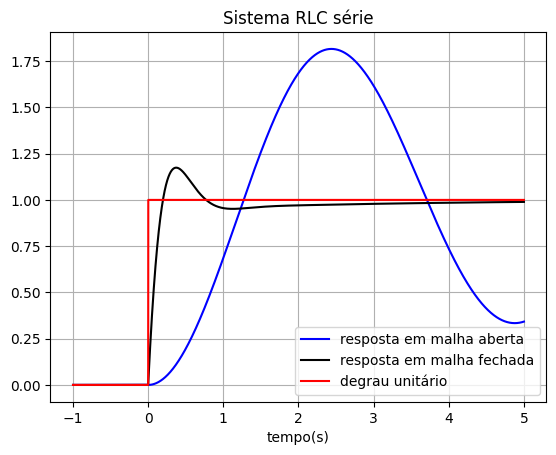

In [ ]:
T = np.linspace(-1, Tsim, 100000)

degrau = np.ones_like(T)
degrau[T<0] = 0
degrau[T>15] = 4.5
degrau[T>35] = 2

T, yout = ctl.forced_response(FTPlanta, T, degrau)
T, you_mf = ctl.forced_response(FTMF, T, degrau)

plt.plot(T, yout, 'b-')
plt.plot(T, you_mf, 'k-')
plt.plot(T, degrau, 'r-')
plt.xlabel('tempo(s)')
plt.legend([ 'resposta em malha aberta','resposta em malha fechada', 'degrau unitário',])
plt.grid()
#plt.xlim(-0.2,15)
#plt.ylim(-0.1,1.9)
plt.title('Sistema RLC série')

# Parâmetros para avaliação de desempenho do controlador

In [ ]:
def resposta(FT, FT_erro, Tsim):
    s = ctl.TransferFunction.s
    T2 = np.linspace(-.01, Tsim, 1000)

    ref = np.ones_like(T2)
    T_mf, you_mf = ctl.step_response(FT, Tsim)

    ref[T2 < 0] = 0
    plt.figure(1)
    plt.plot(T_mf, you_mf, 'b-')
    plt.plot(T2, ref, 'r-')
    plt.xlabel('tempo(s)')
    plt.grid()
    plt.legend(['resposta', 'referencia'])

    Overshoot = (you_mf.max() / you_mf[-1] - 1) * 100

    for i in range(2, len(you_mf) - 1):
        if (abs(you_mf[-i] / you_mf[-1]) > 1.02) or (abs(you_mf[-i] / you_mf[-1]) < 0.98):
            qts = i
            break
    Settling_Time = (T_mf[len(you_mf) - qts])

    s = sympy.symbols('s')
    erro_inf = sympy.limit(s*1/s*(1-FT_erro), s, 0) # Erro para entrada de degrau

    print('''
Overshoot% = {:.2f} %
Settling Time = {:.3f} s
Erro em regime permanente: {:.2f}%'''.format(Overshoot, Settling_Time, erro_inf))

#### Resposta do sistema (overshoot, settling time e erro em regime permanente)

Parâmetros ideais:
*   **Overshoot < 20%**
*   **Erro em regime permanente = 0**
*   **Tempo de assentamento menor possível**




Overshoot% = 18.72 %
Settling Time = 1.858 s
Erro em regime permanente: 0.00%


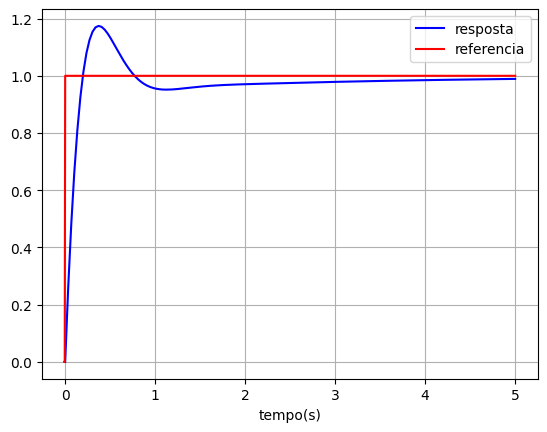

In [ ]:
resposta(FTMF, FTMF_erro, Tsim)

* **Entrada do Machine Learning:** overshoot, settling time e erro em regime permanente
* **Saída do modelo:** P, I e D

